In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandarallel import pandarallel
import numpy as np
import matplotlib.pyplot as plt
import importlib.util

In [2]:
from microsim.population import NHANESDirectSamplePopulation
from microsim.sim_settings import simSettings

In [3]:
pandarallel.initialize(verbose=1) #microsim by default now does not initialize pandarallel
simSettings.pandarallelFlag = True #with this flag all new population instances will be set to use pandarallel

seedSequence = np.random.SeedSequence()
rngStream = np.random.default_rng(seed=seedSequence)

microsimDir = "/Users/deligkaris.1/OneDrive - The Ohio State University Wexner Medical Center/MICROSIM/CODE/microsim"
os.chdir(microsimDir)

In [4]:
popSize = 10000
pop = NHANESDirectSamplePopulation(popSize, 2017, rng=rngStream)

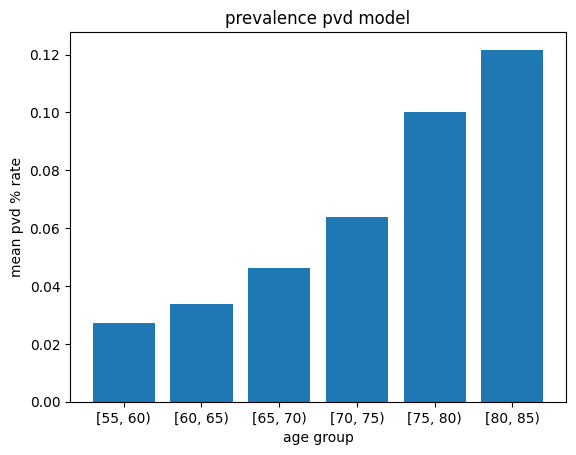

In [5]:
#do the bin counting for the baseline model
ageList = list()
pvdList = list()
for p in pop._people.iloc[:]:
    ageList +=  p._age
    pvdList += p._pvd 
        
basePvd = pd.DataFrame(list(zip(ageList,pvdList)), columns=["age","pvd"])
basePvd["age"]=basePvd["age"].astype('int')
basePvd["ageInterval"] = pd.cut(basePvd["age"], bins=[10,55,60,65,70,75,80,85,90,95,100],right=False)

basePvdMeansByAgeGroup = basePvd.groupby("ageInterval").agg({'pvd' : 'mean'})
basePvdMeansByAgeGroup["labels"] = [f"[{x.left}, {x.right})" for x in  basePvdMeansByAgeGroup.index.array]

labels = basePvdMeansByAgeGroup["labels"].values.tolist()[1:]
values = [x[0] for x in basePvdMeansByAgeGroup.values[1:]]

fig, ax = plt.subplots()
ax.bar(labels, values)
plt.xlabel("age group")
plt.ylabel("mean pvd % rate")
plt.title("prevalence pvd model")
plt.show()

In [6]:
alive, dead = pop.advance_vectorized(150,rng=rngStream)

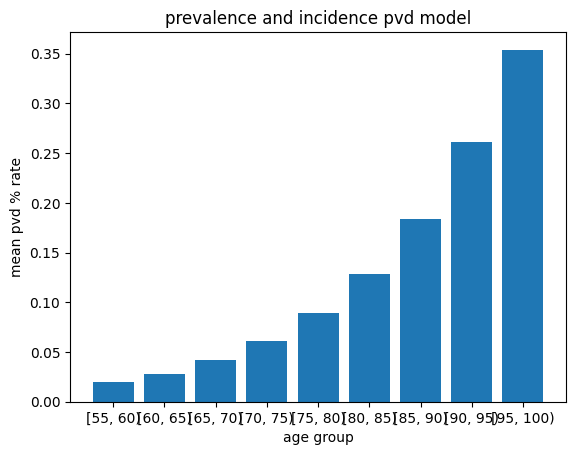

In [7]:
ageList = list()
pvdList = list()
for p in pop._people.iloc[:]:
    ageList +=  p._age[1:]
    pvdList += p._pvd[1:-1] 
        
basePvd = pd.DataFrame(list(zip(ageList,pvdList)), columns=["age","pvd"])
basePvd["age"]=basePvd["age"].astype('int')
basePvd["ageInterval"] = pd.cut(basePvd["age"], bins=[10,55,60,65,70,75,80,85,90,95,100],right=False)

basePvdMeansByAgeGroup = basePvd.groupby("ageInterval").agg({'pvd' : 'mean'})
basePvdMeansByAgeGroup["labels"] = [f"[{x.left}, {x.right})" for x in  basePvdMeansByAgeGroup.index.array]

labels = basePvdMeansByAgeGroup["labels"].values.tolist()[1:]
values = [x[0] for x in basePvdMeansByAgeGroup.values[1:]]

fig, ax = plt.subplots()
ax.bar(labels, values)
plt.xlabel("age group")
plt.ylabel("mean pvd % rate")
plt.title("prevalence and incidence pvd model")
plt.show()

In [ ]:
alive.head()